In [1]:
import numpy as np
import scipy as sp
from scipy import io,integrate,sparse
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

from spec_bin import *
#from lanczos_bin import mystep,distribution

from IPython.display import clear_output
np.set_printoptions(linewidth=300)
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['text.latex.preamble'] = r'\renewcommand{\vec}{\mathbf}'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def mu_T(x,a,b): 
    with np.errstate(divide='ignore',invalid='ignore'):
        return 1/(np.pi)/(np.sqrt((x-a)*(b-x)))

In [4]:
N = 100
lam = np.sort(np.log(np.linspace(1e-3,1-1e-3,N)/(1-np.linspace(1e-3,1-1e-3,N))))
N = len(lam)

a = min(lam)-1e-1
b = max(lam)+1e-1

k_max = 8

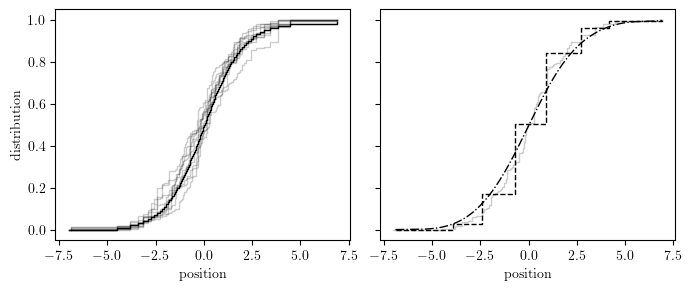

In [5]:
np.random.seed(6)

fig,axs = plt.subplots(1,2,figsize=(8,3),sharey=True)
fig.subplots_adjust(wspace=0.1)

axs[0].set_ylabel('distribution')
axs[0].set_xlabel('position')
axs[1].set_xlabel('position')

axs[0].step(lam,np.arange(N)/N,where='post',lw=1,color='k')

for i in range(10):
    v = np.random.randn(N)
    v /= np.linalg.norm(v)

    axs[0].step(np.append(a,lam),np.append(0,np.cumsum(v**2)),where='post',lw=1,color='k',alpha=.2)


(αro,βro) = lanczos_reorth(np.diag(lam),v,k_max,reorth=True)
θ,ω = get_gq(k_max,αro,βro)


αT = np.ones(2*k_max)*(a+b)/2
βT = np.ones(2*k_max)*(b-a)/4
βT[0] *= np.sqrt(2)
m = get_chebyshev_moments(np.diag(lam),v,k_max,a,b)
xx = np.linspace(a+1e-1,b-1e-1,200)
AQ = eval_poly(xx,m*jackson_weights(2*k_max+1 ),αT,βT)


axs[1].step(np.append(a,lam),np.append(0,np.cumsum(v**2)),where='post',lw=1,color='k',alpha=.2)
axs[1].step(θ,np.cumsum(ω),where='post',lw=1,color='k',ls='--')
axs[1].plot(xx,np.cumsum(AQ*mu_T(xx,a,b))*(xx[1]-xx[0]),lw=1,color='k',ls='-.')

plt.savefig('imgs/intro_spec_approx.pdf',bbox_inches='tight')